# 实验数据处理过程

基于ROOT的实验数据处理步骤可分成两个阶段。

### 第一阶段
第一阶段主要涉及数据格式转换以及初步整理。

实验过程中由前端数据获取系统产生的二进制数据流保存到硬盘形成原始文件。 <font color="Blue">原始数据</font>的格式是由获取系统编写者定义的，原始数据通常由一系列的数据块(data block)组成，每个数据块内包含来自不同插件的数据，每个插件的数据(数据单元)除了包含各个通道记录的探测器的幅度值之外还包含通道地址、是否超界等状态描述字。为了使后续程序识别不同插件的数据，并按照对应的方法进行解码( <font color="Blue">decoding or unpacking</font>), 每个数据单元前后都有特定的标识方便后续程序识别。

解码程序按照数据中的每个插件的特定标识进行解码，将每个事件中包含的不同插件的数据转换成ROOT文件。随后按照实验中探测器和插件的对应表 ( <font color="Blue">mapping</font>), 将上述数据转换成每个事件中探测器的测量值。这个阶段的数据包含有实验的全部信息，一般称为 <font color="Blue">原始ROOT文件</font>。

一般在进行mapping的同时，对ADC，TDC分别进行能量和时间刻度。ADC，TDC等插件记录的道值(channels)为整数值(分立值: 1,2,3,4. ..)， <font color="Red">在进行刻度之前需要把分立值进行连续化</font>。具体做法是对每次测量值上加入[-0.5,0.5) 之间的随机数。注意上述操作并没有破坏原有信息，原有信息可通过取整的方法恢复。

对于每个信号，给出超出范围外数据缺省设定值，如Si的合理能量信号在5-100MeV时，对于<5MeV的能量设定-1作为超出合理范围数据的标志。

![1](phase1.png)

###  <font color="Blue">模拟ADC histogram 刻度</font>

In [1]:
TRandom3 *r=new TRandom3(0);
TH1D *hu=new TH1D("hu","Uniform amplitude distribution", 400,0,400);
TH1D *heu=new TH1D("heu","Uniform energy distribution", 160,0,160);
TH1D *heud=new TH1D("heud","Uniform energy distribution-after dithering", 160,0,160);
TCanvas *c1=new TCanvas("c1","c1");

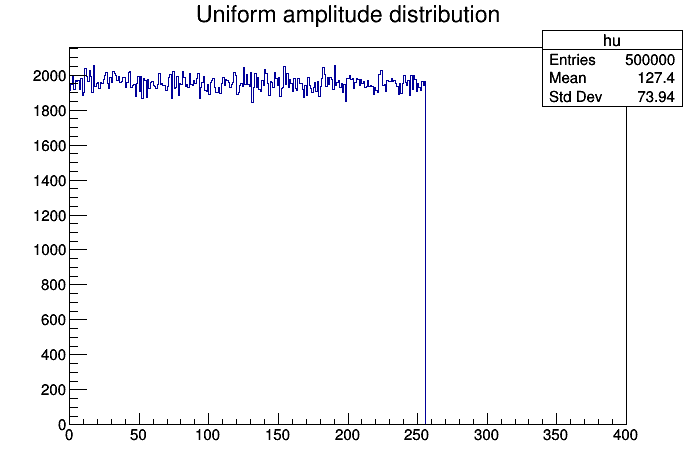

In [2]:
for(int i=0;i<500000;i++) {
   int val = (int) r->Uniform(0,256);
   hu->Fill(val);               // 填入int型均匀分布
   heu->Fill(0.4 * val );   //刻度
   double dval = val + r->Uniform(-0.5,0.5);//连续化
   heud->Fill(0.4 * dval); //刻度
}
hu->SetMinimum(0);
hu->Draw();
c1->Draw();

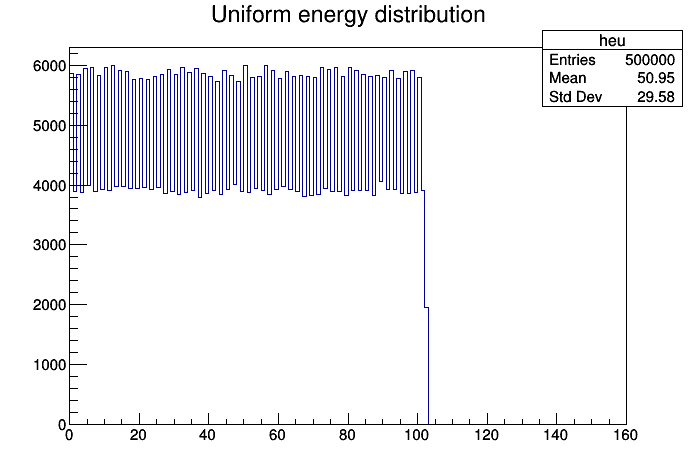

In [3]:
heu->SetMinimum(0);
heu->Draw();//未进行连续化，刻度后能谱失真。
c1->Draw();

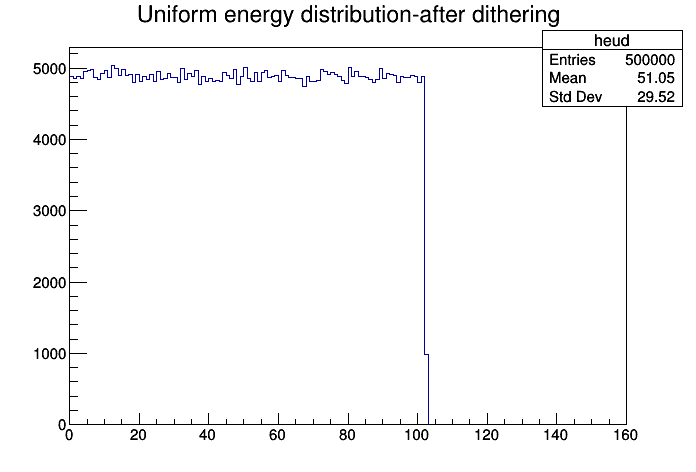

In [4]:
heud->SetMinimum(0);
heud->Draw();//先连续化，后刻度，能谱与原ADC能谱一致。
c1->Draw();

### 第二阶段
第二阶段 包括实验物理量提取，物理分析等过程。
每个过程都涉及信息的整理和压缩，文件大小逐步减小，在内存中读入的时间越来越快。
![2](phase2.png)